In [1]:
from __future__ import print_function, unicode_literals, division, absolute_import
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import pandas as pd

In [2]:
import radiomics as pyrad
from radiomics.featureextractor import RadiomicsFeaturesExtractor

# Make Test Image and Mask
Here we make test images (a simple trianglular mask and a uniform progression)

In [3]:
test_mask_arr = np.stack(32*[np.eye(32)],0).astype(int)
test_img_arr = np.linspace(0,100, num = np.prod(test_mask_arr.shape)).reshape(test_mask_arr.shape)
test_mask = sitk.GetImageFromArray(test_mask_arr)
test_img = sitk.GetImageFromArray(test_img_arr)

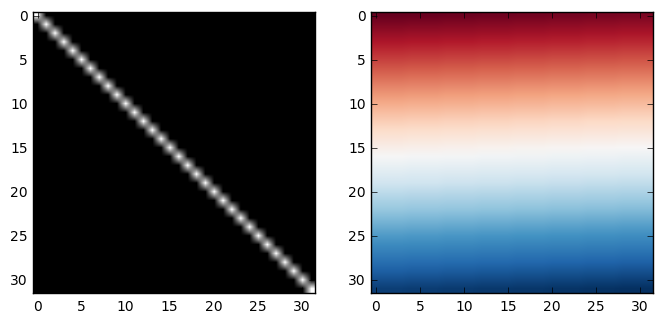

In [4]:
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))
ax1.imshow(test_mask_arr[0], cmap = 'bone')
ax2.imshow(test_img_arr[0], cmap = 'RdBu')

# Extract simple stats
Here is just the simple statistics for testing

In [5]:
extractor = RadiomicsFeaturesExtractor( verbose = True)
extractor.disableAllFeatures()
extractor.enableFeaturesByName(firstorder = [])
out_dict = extractor.execute(test_img, test_mask)
pd.DataFrame([out_dict])

		Computing firstorder


,general_info_BoundingBox,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,general_info_InputImages,general_info_MaskHash,general_info_Version,general_info_VolumeNum,general_info_VoxelNum,original_firstorder_10Percentile,...,original_firstorder_Median,original_firstorder_Minimum,original_firstorder_Range,original_firstorder_RobustMeanAbsoluteDeviation,original_firstorder_RootMeanSquared,original_firstorder_Skewness,original_firstorder_StandardDeviation,original_firstorder_TotalEnergy,original_firstorder_Uniformity,original_firstorder_Variance
0,(0; 0; 0; 32; 32; 32),{'interpolator': 3; 'verbose': True; 'label': ...,dd1063b4904affacbcfa769510e55d35690f6961,(1.0; 1.0; 1.0),{'Original': {}},d72fb2bdbaffacc0632f4f1a782fdbc10b9155e0,v1.0.1.post5.dev0+g72ac3cb,1,1024,10.009766,...,50.0,0.0,100.0,19.97066,2050.203267,0.0,28.869275,4.304213e+09,0.25,833.435014


# Run using everything
Here we run the extractor with everything, which causes a few issues but returns over 100 columns worth of radiomics features!

In [6]:
extractor = RadiomicsFeaturesExtractor(verbose = True)
extractor.enableAllFeatures()
out_dict = extractor.execute(test_img, test_mask)
pd.DataFrame([out_dict])

FAILED: Traceback (most recent call last):
  File "/Users/mader/anaconda/lib/python3.5/site-packages/pyradiomics-1.0.1.post5.dev0+g72ac3cb-py3.5.egg/radiomics/base.py", line 73, in calculateFeatures
    self.featureValues[feature] = eval(call)
  File "<string>", line 1, in <module>
  File "/Users/mader/anaconda/lib/python3.5/site-packages/pyradiomics-1.0.1.post5.dev0+g72ac3cb-py3.5.egg/radiomics/shape.py", line 221, in getMaximum2DDiameterSliceFeatureValue
    return self._getMaximum2Ddiameter(0)
  File "/Users/mader/anaconda/lib/python3.5/site-packages/pyradiomics-1.0.1.post5.dev0+g72ac3cb-py3.5.egg/radiomics/shape.py", line 126, in _getMaximum2Ddiameter
    for i in numpy.unique(a[:, dim]):
IndexError: too many indices for array

FAILED: Traceback (most recent call last):
  File "/Users/mader/anaconda/lib/python3.5/site-packages/pyradiomics-1.0.1.post5.dev0+g72ac3cb-py3.5.egg/radiomics/base.py", line 73, in calculateFeatures
    self.featureValues[feature] = eval(call)
  File "<strin

		Computing shape
		Computing firstorder
		Computing glrlm
		Computing glcm


calculate GLSZM: 100%|██████████| 4/4 [00:00<00:00, 37.88it/s]

		Computing glszm


,general_info_BoundingBox,general_info_GeneralSettings,general_info_ImageHash,general_info_ImageSpacing,general_info_InputImages,general_info_MaskHash,general_info_Version,general_info_VolumeNum,general_info_VoxelNum,original_firstorder_10Percentile,...,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_Roundness,original_shape_SphericalDisproportion,original_shape_Sphericity,original_shape_SurfaceArea,original_shape_SurfaceVolumeRatio,original_shape_Volume
0,(0; 0; 0; 32; 32; 32),{'interpolator': 3; 'verbose': True; 'label': ...,dd1063b4904affacbcfa769510e55d35690f6961,(1.0; 1.0; 1.0),{'Original': {}},d72fb2bdbaffacc0632f4f1a782fdbc10b9155e0,v1.0.1.post5.dev0+g72ac3cb,1,1024,10.009766,...,NaN,NaN,NaN,53.693575,0.224041,5.823731,0.171711,2861.225334,2.794165,1024.0


In [7]:

for c_name in extractor.getFeatureClassNames():
    print('Calculating {} features'.format(c_name))
    featureClass = extractor.featureClasses[c_name](test_img, test_mask)

Calculating firstorder features
Calculating shape features
Calculating glszm features
Calculating glcm features
Calculating glrlm features
